In [2]:
import networkx as nx
from networkx import *
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from nltk import sent_tokenize,word_tokenize
import numpy as np

import sys
sys.path.append('../..')
sys.path.append('../../utils/')
from utils import *


import fastText
model = fastText.load_model('../../../Divers_Data_Maitrise/wiki.simple/wiki.simple.bin')

In [10]:
# def Alignement_graph_bipartite(question, sequence):

def Alignement_graph_bipartite(question,sequence,ignore_edge_value = 0.0):
    '''
    Fonction qui crée un graphe bipartit (question, sentence) et qui affecte la similarité cosine comme poids de chaque arete.
    '''
    G=nx.Graph()

    list_words_question = word_tokenize(question)
    list_words_sequence = word_tokenize(sequence)
    
    
    nb_words_question = len(list_words_question)
    nb_words_sequence = len(list_words_sequence)
    height_colum = max(nb_words_question,nb_words_sequence)
    y_linspace_question = np.linspace(0,height_colum,nb_words_question)
    y_linspace_sentence = np.linspace(0,height_colum,nb_words_sequence)
    
    fixed_positions={}
    labels={}
    
    
    list_major_edges = []
    for i in range(0,nb_words_sequence):
        num_node = nb_words_question + i
        G.add_node(num_node)
        labels[num_node]=list_words_sequence[i]
        
        fixed_positions[num_node] = (2,y_linspace_sentence[nb_words_sequence-i-1])
    
    for i in range(0,nb_words_question):
        G.add_node(i)
        labels[i]=list_words_question[i]
        fixed_positions[i] = (0,y_linspace_question[nb_words_question-i-1])
        
        max_sim = 0.0
        major_edge = None
        vect_word_question = model.get_word_vector(list_words_question[i])
        for j in range(0,nb_words_sequence):
            num_node = nb_words_question + j
            vect_word_sentence = model.get_word_vector(list_words_sequence[j])
            sim=cosine_similarity(vect_word_sentence, vect_word_question)
            if ignore_edge_value<sim:
                G.add_edge(i,num_node,sim=sim)
            if max_sim<sim :
                max_sim = sim
                major_edge = (i,num_node)
        if major_edge != None : list_major_edges.append(major_edge)
    
    
    pos = nx.spring_layout(G,pos=fixed_positions, fixed=fixed_positions.keys())
    weight_label = nx.get_edge_attributes(G,'weight')
     
    plt.figure(3,figsize=(15,height_colum*1.75))
    nx.draw_networkx_nodes(G,pos,node_color='w')
    nx.draw_networkx_labels(G,pos,labels,font_size=14)
    nx.draw_networkx_labels(G,pos,weight_label,font_size=12)
    nx.draw_networkx_edge_labels(G,pos,node_color='b', label_pos=0.83)
    nx.draw_networkx_edges(G,pos,node_color='b')
    nx.draw_networkx_edges(G,pos,node_color='b',edgelist =list_major_edges,  width = 2.5)
    
    plt.axis('off')
    plt.show()
    


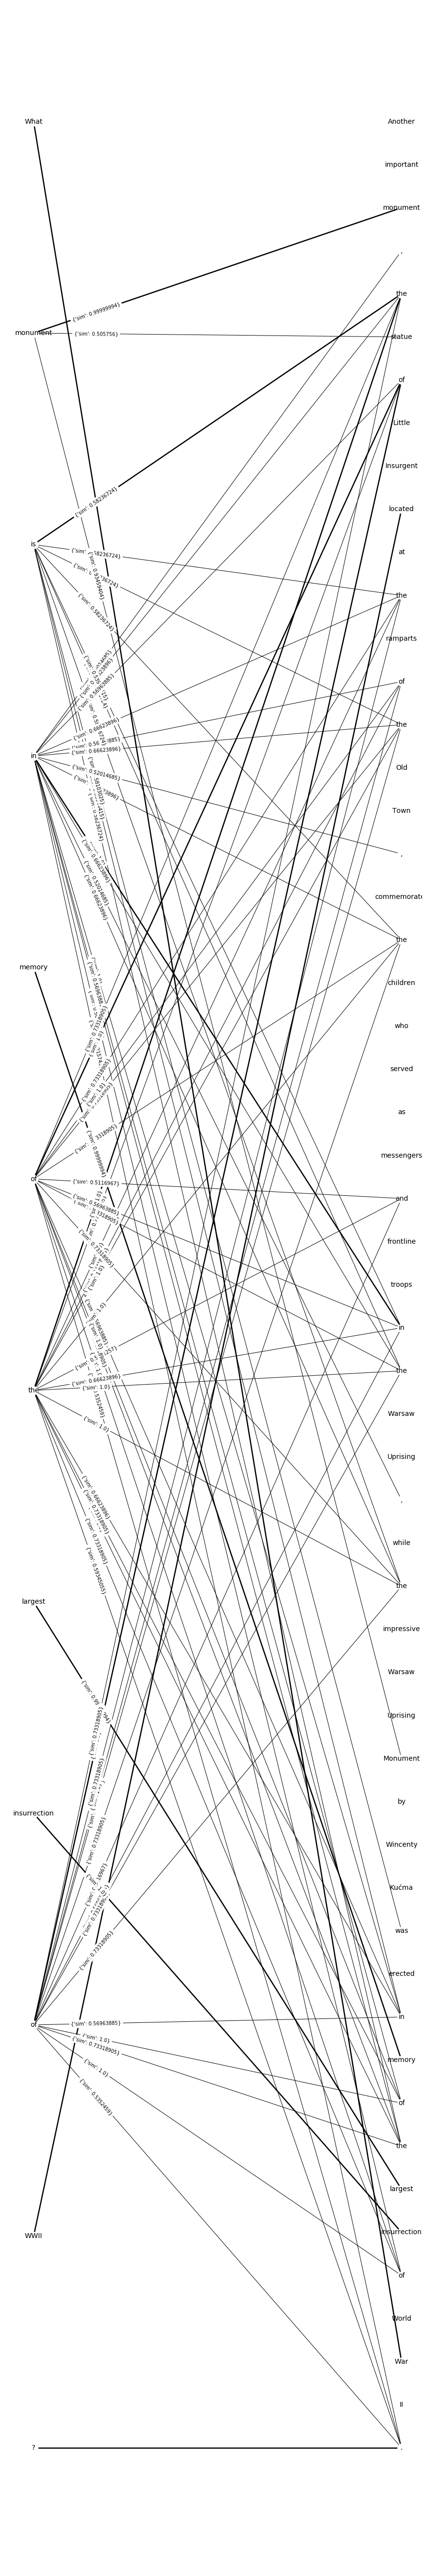

In [11]:
Alignement_graph_bipartite(" What monument is in memory of the largest insurrection of WWII? "," Another important monument, the statue of Little Insurgent located at the ramparts of the Old Town, commemorates the children who served as messengers and frontline troops in the Warsaw Uprising, while the impressive Warsaw Uprising Monument by Wincenty Kućma was erected in memory of the largest insurrection of World War II. ", 0.5)


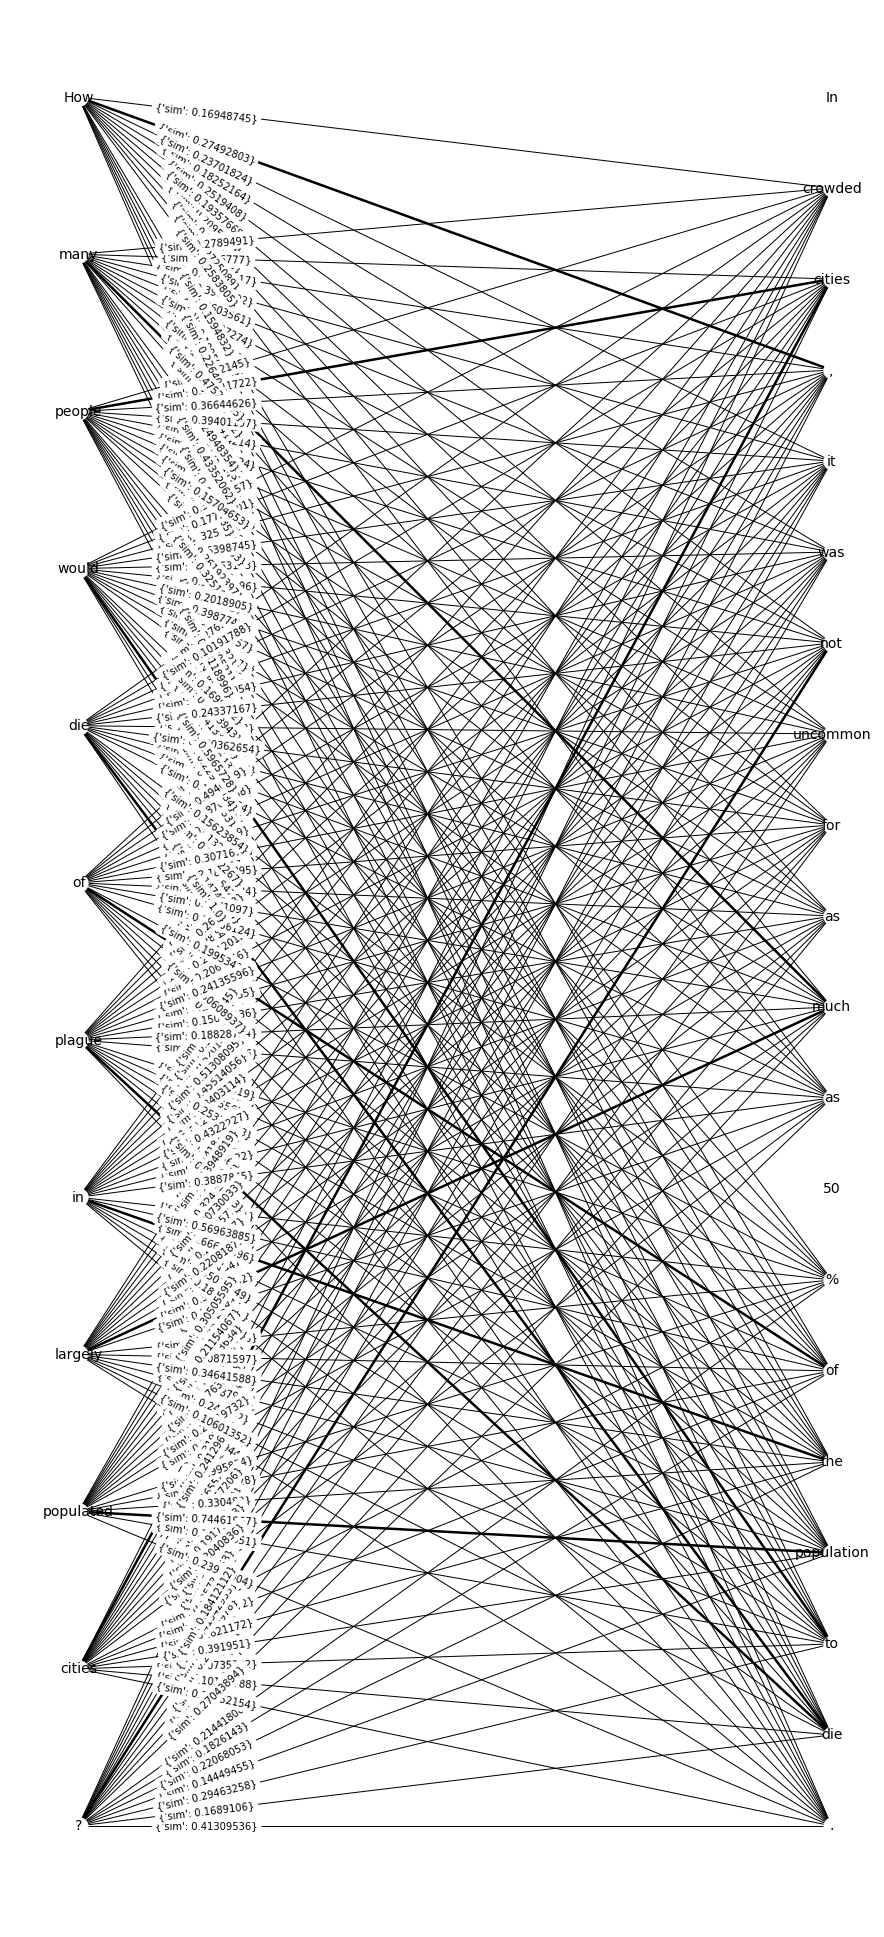

In [7]:
Alignement_graph_bipartite(" How many people would die of plague in largely populated cities? "," In crowded cities, it was not uncommon for as much as 50% of the population to die. ", 0.
                           0)

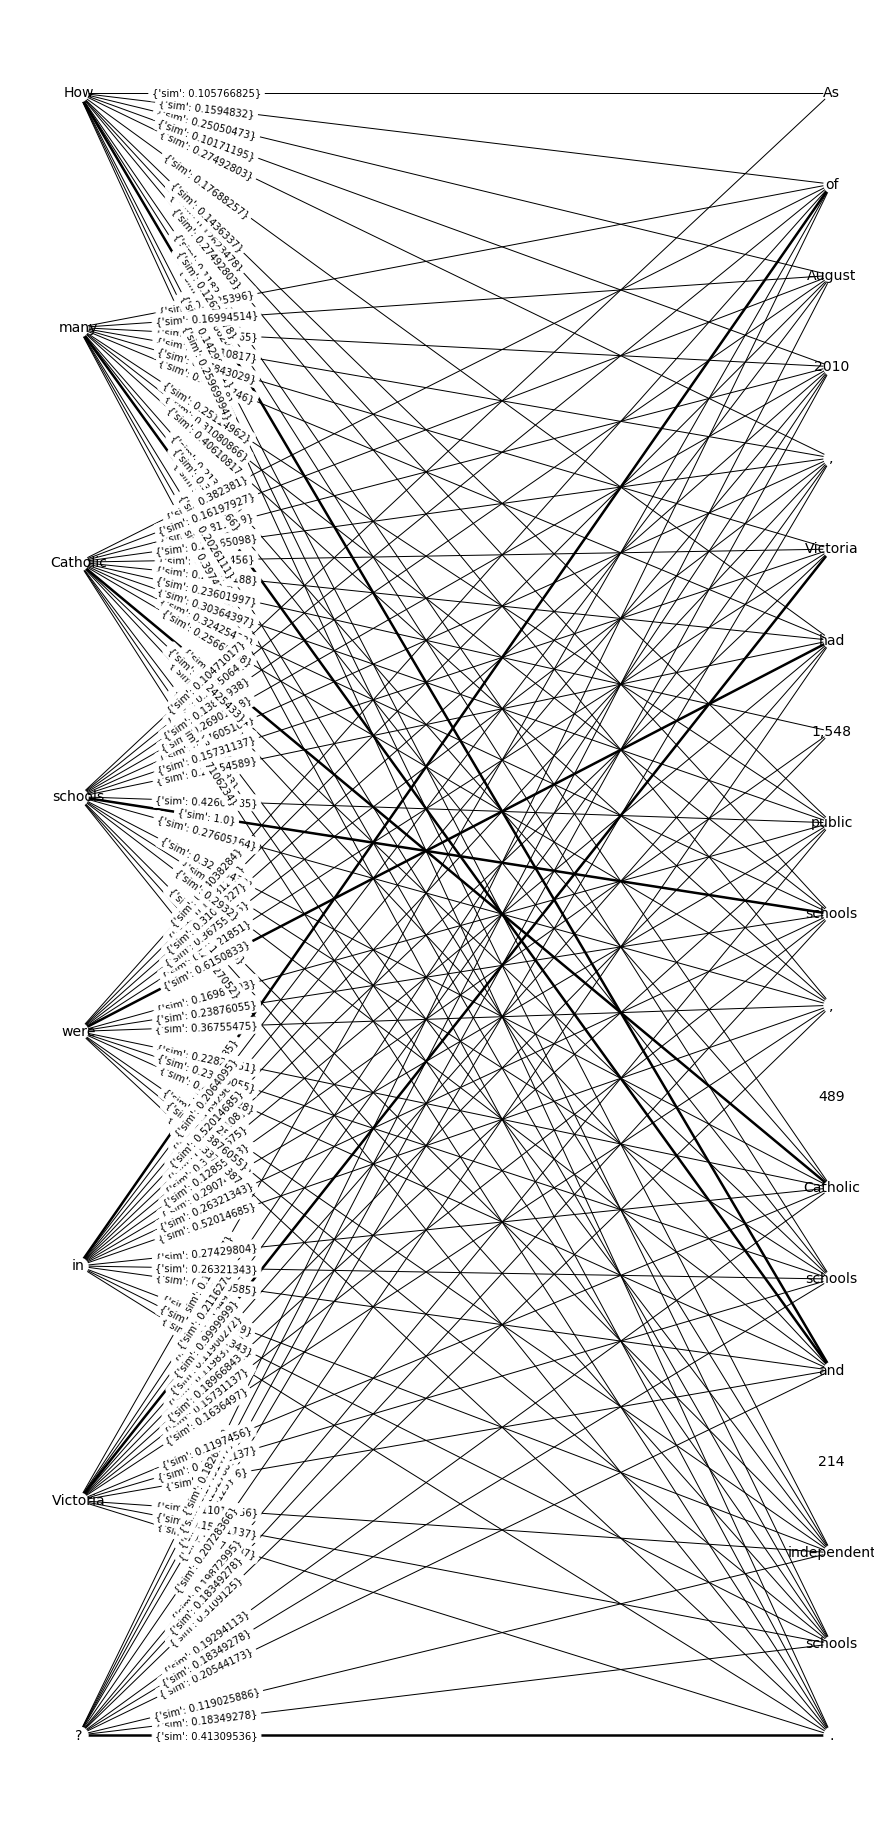

In [8]:
Alignement_graph_bipartite(" How many Catholic schools were in Victoria? "," As of August 2010, Victoria had 1,548 public schools, 489 Catholic schools and 214 independent schools. ", 0.10)